Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Reading Data

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
len(df)

303

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
df['output'].unique()

array([1, 0], dtype=int64)

In [7]:
len(df[df['sex']==1])

207

In [8]:
df.corr()['output'].sort_values()[:-1]

exng       -0.436757
oldpeak    -0.430696
caa        -0.391724
thall      -0.344029
sex        -0.280937
age        -0.225439
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slp         0.345877
thalachh    0.421741
cp          0.433798
Name: output, dtype: float64

Exploratory Data Analysis

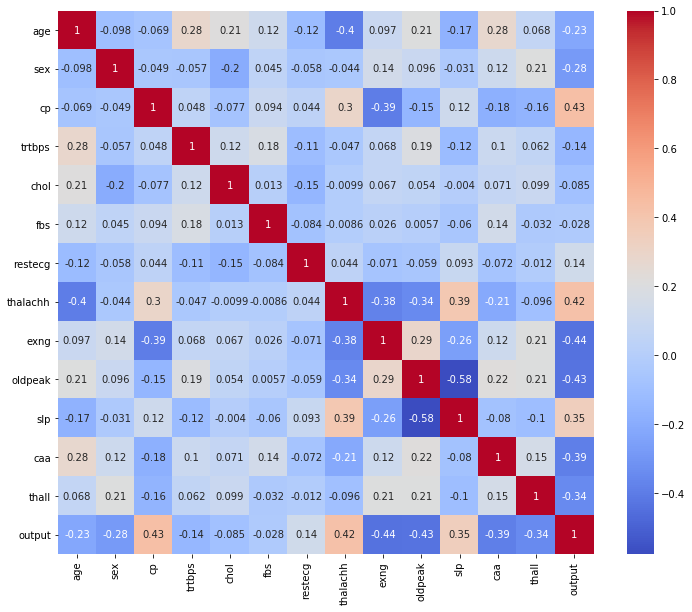

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

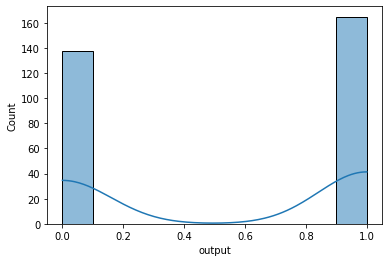

In [10]:
sns.histplot(data=df,x='output',kde=True)

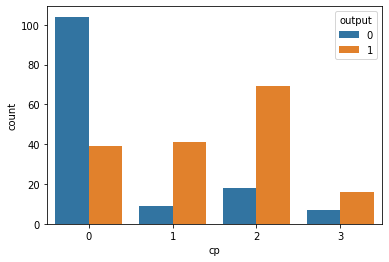

In [11]:
sns.countplot(data=df , x = 'cp', hue ='output')

Training Model

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('output',axis=1)
y = df['output']

In [14]:
df['thall'].nunique()

4

In [15]:
X_dummies = pd.get_dummies(data=X,columns=['sex','cp','fbs','restecg','exng','slp','caa','thall'] , drop_first=True)

In [16]:
X_dummies.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.3, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()

In [20]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# y_train = sc.fit_transform(y_train)
# y_test = sc.transform(y_test)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression(fit_intercept=True, random_state=42)

In [23]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
lr_pred = lr.predict(X_test)

[0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1]


In [25]:
lr.score(X_test,y_test)

0.8461538461538461

In [26]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score

In [27]:
print(classification_report(y_test,lr_pred))
print('\n')
print(confusion_matrix(y_test,lr_pred))
print('\n')
print(f1_score(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83        41
           1       0.85      0.88      0.86        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



[[33  8]
 [ 6 44]]


0.8627450980392156


In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
lr_accuracies = cross_val_score(lr,X_test,y_test, cv = 41)
print(lr_accuracies.mean())

0.8252032520325202


In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30)

In [31]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [32]:
knn_pred = knn.predict(X_test)

In [33]:
knn.score(X_test,y_test)

0.8681318681318682

In [34]:
Accuracy = []
for i in range(1,41):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    knn_accuracies = cross_val_score(knn , X_test , y_test , cv = 41)
    knn_accuracy_i = knn_accuracies.mean()
    Accuracy.append(knn_accuracy_i)

In [35]:
knn_df = pd.DataFrame({'Neighbours': np.arange(1,41) , 'Accuracy': Accuracy})

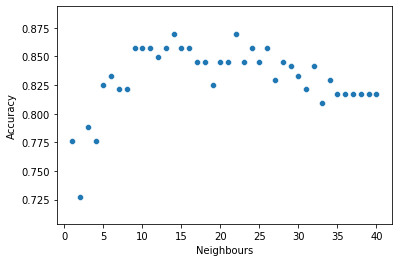

In [36]:
sns.scatterplot(data = knn_df, x = 'Neighbours',y = 'Accuracy')

In [37]:
Accuracy2 = []
for i in range(1,41):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    knn_accuracies = knn.score(X_test,y_test)
    Accuracy2.append(knn_accuracies)

In [38]:
knn_df2 = pd.DataFrame({'Neighbours': np.arange(1,41) , 'Accuracy': Accuracy2})

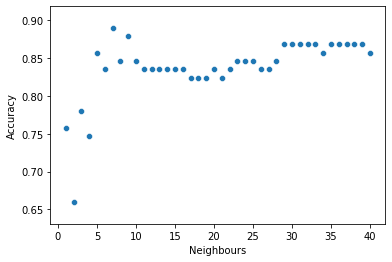

In [39]:
sns.scatterplot(data = knn_df2, x = 'Neighbours',y = 'Accuracy')

In [40]:
knn_df[knn_df['Accuracy']==knn_df['Accuracy'].max()]

,Neighbours,Accuracy
13,14,0.869919
21,22,0.869919


In [41]:
knn = KNeighborsClassifier(14)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

[[34  7]
 [ 8 42]]


              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



In [42]:
knn_accuracies = cross_val_score(knn, X_test, y_test, cv = 41)
print(knn_accuracies.mean())

0.8699186991869918


In [43]:
from sklearn.svm import SVC

In [44]:
svc = SVC()

In [45]:
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)